## Plot Solutions to Time-dependent Schrodinger Equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def read_wavefunction_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # get the x and t grids
    x_grid = np.array(data[0].split()[3:], dtype=float)
    t_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get wavefunction
    wavefunction = np.zeros((len(x_grid), len(t_grid)), dtype=complex)

    for i in range(len(t_grid)):
        z_str = [x.strip(')').strip('(').split(',') for x in data[i + 2].split()]
        wavefunction[:, i] = np.array([complex(float(a[0]), float(a[1])) for a in z_str], dtype=complex)

    return x_grid, t_grid, wavefunction

In [3]:
def get_norm(complex_array, dx):
    return np.sqrt(np.real(sum(np.conj(complex_array) * complex_array * dx)))

In [4]:
plot_dir = f"..{os.sep}plots"

## Load data

In [5]:
filename = "../solution.txt"

In [6]:
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

In [7]:
dx = x_grid[1] - x_grid[0]
dx

0.010010010010010006

In [8]:
Nx = len(x_grid)
Nt = len(t_grid)
Nx, Nt

(1000, 2000)

In [9]:
tmax = t_grid[-1]
tmax

10.0

## Plot Square Norm over Time

In [10]:
square_norm_wf = np.absolute(wavefunction) ** 2

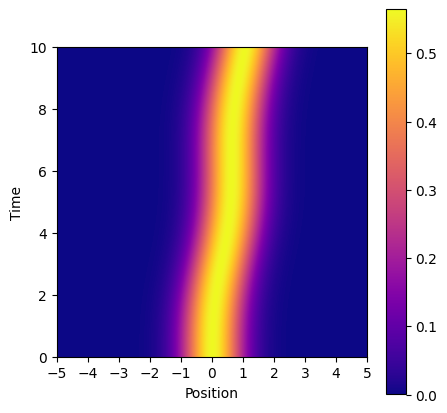

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(square_norm_wf.T, origin="lower", extent=[x_grid[0], x_grid[-1], t_grid[0], t_grid[-1]], cmap="plasma")
plt.xlim([-5, 5])
plt.xticks(np.arange(-5, 6))
plt.xlabel("Position")
plt.ylabel("Time")
plt.colorbar();

## Plot Average Position

In [12]:
x_grid_mat = np.tile(x_grid.T.reshape((Nx, 1)), (1, Nt))

In [13]:
x_grid_mat.shape

(1000, 2000)

In [14]:
ave_x = (square_norm_wf * x_grid_mat * dx).sum(axis=0)

In [15]:
ave_x.shape

(2000,)

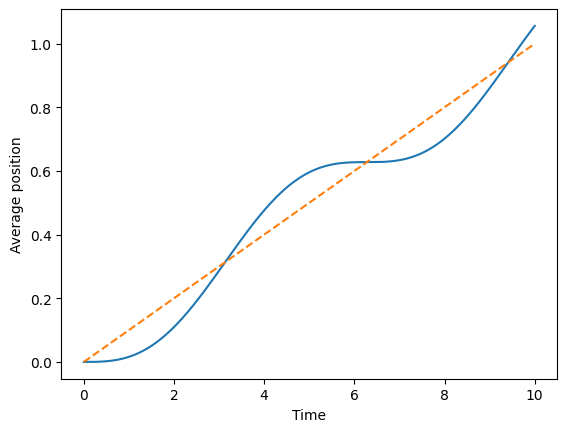

In [16]:
plt.plot(t_grid, ave_x)
plt.plot(t_grid, t_grid / tmax, "--")
plt.xlabel("Time")
plt.ylabel("Average position");